**Machine learning** - Machine learning is a subset of artificial intelligence that focuses on enabling systems to learn from data and improve their performance on a task without explicit programming.

**Types of Machine Learning**
   * 1. Supervised Learning
      - Classification - If model is built to predict a category out of fixed number of categories
          - KNN
          - Logistic
          - Decision tree
          - Random forest
          - SVM
          - Naive Bayes
      - Regression
   * 2. Unsupervised Learning
   * 3. Reinforcement Learning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
n1 = np.random.randint(1,20,(5,2))
n2 = np.random.randint(17,40,(5,2))
n3 = np.random.randint(37,60,(5,2))

d1 = pd.DataFrame(np.vstack((n1,n2,n3)) , columns = ['A', 'B'])
d1['Label'] = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]
d1

,A,B,Label
0,14,1,0
1,4,19,0
2,10,4,0
3,11,11,0
4,19,11,0
5,27,27,1
6,39,25,1
7,28,31,1
8,19,30,1
9,24,19,1


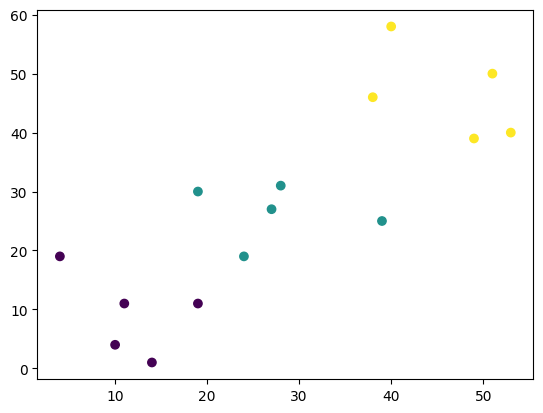

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(d1['A'] , d1['B'] , c = d1['Label'])
plt.show()

**KNN**
  * K nearest neighbors

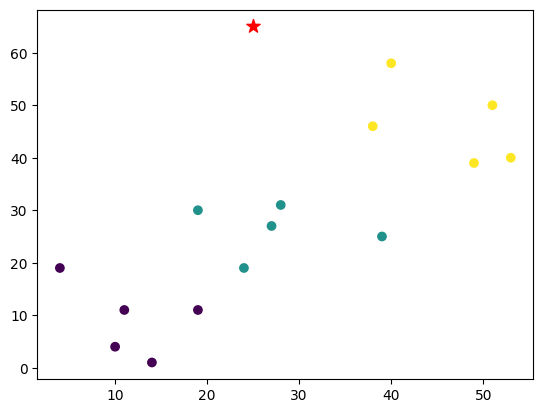

In [ ]:
#Predict the label for x_new = [25 , 65]

import matplotlib.pyplot as plt
plt.scatter(d1['A'] , d1['B'] , c = d1['Label'])
plt.scatter(25,65,marker='*',s=100,c='r')
plt.show()

In [ ]:
x_new = [25 , 65]

d1['distance'] = ((d1['A'] - x_new[0])**2 + (d1['B'] - x_new[1])**2)**0.5

In [ ]:
d1.sort_values('distance').head(5)

,A,B,Label,distance
10,40,58,2,16.552945
13,38,46,2,23.021729
11,51,50,2,30.016662
7,28,31,1,34.132096
14,49,39,2,35.383612


**Out of 5 nearest data points from [25,65] , 4 data points are of category 2, so, [25, 65] will be classified as category 2**

**Scikit-Learn for K-Neighbors Classifier**

In [ ]:
n1 = np.random.randint(1,20,(5,2))
n2 = np.random.randint(17,40,(5,2))
n3 = np.random.randint(37,60,(5,2))

d1 = pd.DataFrame(np.vstack((n1,n2,n3)) , columns = ['A', 'B'])
d1['Label'] = [0,0,0,0,0,1,1,1,1,1,2,2,2,2,2]
d1

,A,B,Label
0,4,17,0
1,7,5,0
2,7,3,0
3,9,3,0
4,4,14,0
5,37,32,1
6,31,24,1
7,39,29,1
8,17,24,1
9,38,27,1


In [ ]:
X = d1[['A','B']]   #Features or independent variables
y = d1['Label']    #Labels or dependent variables

from sklearn.neighbors import KNeighborsClassifier         #Import algorithm to be used for training and predictions
modelA = KNeighborsClassifier(n_neighbors=5)               #Define the model to be trained and make predictions using 5 nearest neighbors
modelA.fit(X,y)                                         #Train the model using the features and labels

KNeighborsClassifier()

In [ ]:
Yp = modelA.predict(X)               #Predictions made on given set of features

In [ ]:
(y == Yp).sum()/len(X)                #compare predicted value with y ('real labels') ,model accuracy while predicting on X

np.float64(1.0)

In [ ]:
print(modelA.predict([[25,65]]))          #Model prediction on [25,65]

[2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Classification model for predicting flower Species**

In [ ]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Build a predictive model to predict 'Species' and identify the accuracy of the model

In [ ]:
X = df.drop(columns = ['Id','Species'])
y = df['Species']

In [ ]:
#y

In [ ]:
#Split the data into two parts
#majority - 75% -> Used for training
#minority - 25% -> Used for evaluation & validation

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.75)

In [ ]:
print(X.shape , ' ' , xtrain.shape , ' ' , xtest.shape)
print(y.shape , ' ' , ytrain.shape , ' ' , ytest.shape)

(150, 4)   (112, 4)   (38, 4)
(150,)   (112,)   (38,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelB = KNeighborsClassifier(n_neighbors=5)
modelB.fit(xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
ytrainPred = modelB.predict(xtrain)
ytestPred = modelB.predict(xtest)

#Compare the real labels with the predicted labels - training data
print("Model accuracy on training data-")
print((ytrain == ytrainPred).sum()/len(xtrain))

print()

print("Model accuracy on test data-")
print((ytest == ytestPred).sum()/len(xtest))

Model accuracy on training data-
0.9732142857142857

Model accuracy on test data-
0.9736842105263158


In [ ]:
#[2.3,3.2,3.9,3.4] -- ?????
print(modelB.predict([[2.3,3.2,3.9,3.4]]))

['Iris-versicolor']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Build and evaluate a predictive model for Wine class classification, using the data given below**

In [ ]:
df = pd.read_csv('https://github.com/bipulshahi/Dataset/raw/refs/heads/main/wine.csv')
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
df['Target'].unique()

array([0, 1, 2])